### Data Preprocessing:
Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.


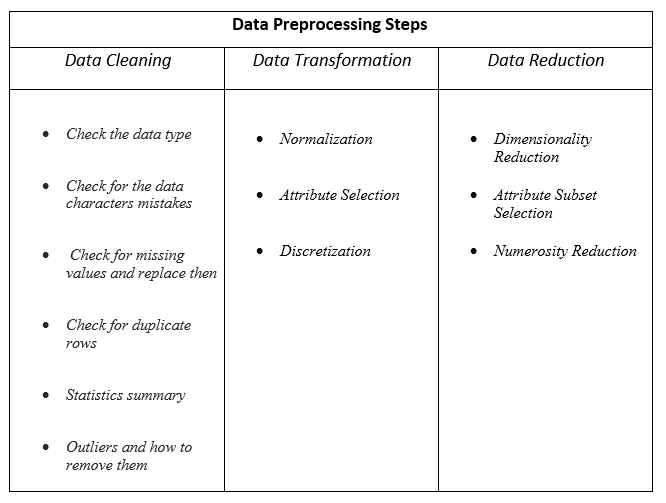

###Attribute information:
*	age - age in years

* sex - (1 = male; 0 = female)

*	cp - chest pain type

*	trestbps - resting blood pressure (in mm Hg on admission to the hospital)

*	chol - serum cholestoral in mg/dl
*	fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*	restecg - resting electrocardiographic results
*	thalach - maximum heart rate achieved
*	exang - exercise induced angina (1 = yes; 0 = no)
*	oldpeak - ST depression induced by exercise relative to rest
*	slope - the slope of the peak exercise ST segment
*	ca - number of major vessels (0-3) colored by flourosopy
*	thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
*	target - have disease or not (1=yes, 0=no)



**Import and get to know about data**


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [ ]:
df = pd.read_csv('heartdisease1.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0


In [ ]:
df.shape

(1328, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1327 non-null   float64
 4   chol      1327 non-null   float64
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1326 non-null   float64
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 145.4 KB


**Data Cleaning**

a) Check the data type.

The variables types are

Binary: sex, fbs, exang, target

Categorical: cp, restecg, slope, ca, thal

Continuous: age, trestbps, chol, thalac, oldpeak

Is the type of variable correctly classified by python ? Let’s get to know the data type.


In [ ]:
# to know the type of varibale
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

So now we know for each variable, lets check and change the type

In [ ]:
# So now we know for each variable, lets check and change the type
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

b. Check for the data characters mistakes

1- feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.

In [ ]:
df['ca'].unique()

array([2, 0, 1, 3, 4])

In [ ]:
# count the number in of each catagory decending order
df.ca.value_counts()

0    753
1    291
2    172
3     89
4     23
Name: ca, dtype: int64

In [ ]:
# to find the row for '4'
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,1
83,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,1
128,52,1,2,138.0,223.0,0,1,169.0,0,0.0,2,4,2,1
208,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,1
242,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,1
290,52,1,2,138.0,223.0,0,1,169.0,0,0.0,2,4,2,1
340,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,1
348,43,1,0,132.0,247.0,1,0,143.0,1,0.1,1,4,3,0
417,52,1,2,138.0,223.0,0,1,169.0,0,0.0,2,4,2,1
428,43,1,0,132.0,247.0,1,0,143.0,1,0.1,1,4,3,0


In [ ]:
df.loc[df['ca']==4, 'ca'] =np.NaN

In [ ]:
df['ca'].unique()

array([ 2.,  0.,  1.,  3., nan])

2. Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.


In [ ]:
df.thal.value_counts()

2    710
3    527
1     82
0      9
Name: thal, dtype: int64

In [ ]:
df.loc[df['thal']==0,'thal'] = np.NaN

In [ ]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
df['thal'].unique()

array([ 3.,  2.,  1., nan])

c) Check for missing values and replace them

In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol         1
fbs          0
restecg      0
thalach      2
exang        0
oldpeak      0
slope        0
ca          23
thal         9
target       0
dtype: int64

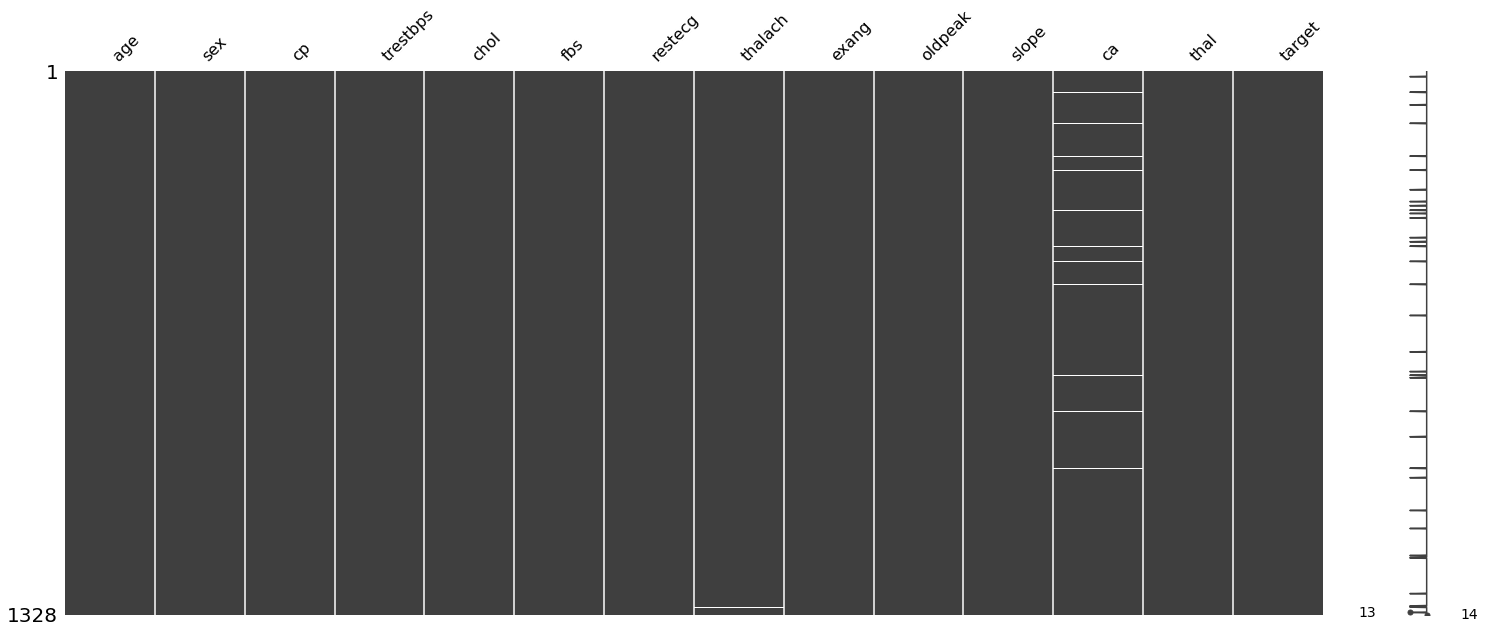

In [ ]:
msno.matrix(df)

In [ ]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

d) Check for duplicate rows

In [ ]:
duplicated = df.duplicated().sum()
if duplicated:
  print('Duplicates Rows in Dataset are: {}'.format(duplicated))
else:
  print('Dataset contains no duplicate variable')

Duplicates Rows in Dataset are: 1022


In [ ]:
duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3.0,2.0,0


e) Statistics summary

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.597892,246.064759,0.149096,0.529367,149.292922,0.334337,1.064232,1.388554,0.679217,2.335090,0.520331
std,9.071150,0.461519,1.029854,17.506103,51.626728,0.356318,0.527220,22.915773,0.471936,1.171519,0.617203,0.937917,0.588693,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


f) Outliers and how to remove them

Now, let’s define and list out the outliers..!!


In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 39
For the feature chol, No of Outliers is 21
For the feature thalach, No of Outliers is 5
For the feature oldpeak, No of Outliers is 9


let drop outliers

In [ ]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


3. Distributions and relationship.

a) target variable distribution

In [ ]:
print(df.target.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

In [ ]:
from sklearn import preprocessing
# Get dataset
# df = pd.read_csv("heartdisease1.csv")
# Normalize all dataset
normalized_X = preprocessing.normalize(df)
df = pd.DataFrame(normalized_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.171891,0.003306,0.0,0.413199,0.700785,0.000000,0.003306,0.555339,0.000000,0.003306,0.006611,0.006611,0.009917,0.0
1,0.179004,0.003377,0.0,0.472842,0.685621,0.003377,0.000000,0.523503,0.003377,0.010470,0.000000,0.000000,0.010132,0.0
2,0.261156,0.003731,0.0,0.540967,0.649160,0.000000,0.003731,0.466351,0.003731,0.009700,0.000000,0.000000,0.011192,0.0
3,0.200274,0.003283,0.0,0.485910,0.666484,0.000000,0.003283,0.528591,0.000000,0.000000,0.006566,0.003283,0.009850,0.0
4,0.178548,0.000000,0.0,0.397413,0.846663,0.002880,0.002880,0.305259,0.000000,0.005472,0.002880,0.008639,0.005760,0.0


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.171891,0.003306,0.000000,0.413199,0.700785,0.000000,0.003306,0.555339,0.000000,0.003306,0.006611,0.006611,0.009917,0.0
1,0.179004,0.003377,0.000000,0.472842,0.685621,0.003377,0.000000,0.523503,0.003377,0.010470,0.000000,0.000000,0.010132,0.0
2,0.261156,0.003731,0.000000,0.540967,0.649160,0.000000,0.003731,0.466351,0.003731,0.009700,0.000000,0.000000,0.011192,0.0
3,0.200274,0.003283,0.000000,0.485910,0.666484,0.000000,0.003283,0.528591,0.000000,0.000000,0.006566,0.003283,0.009850,0.0
4,0.178548,0.000000,0.000000,0.397413,0.846663,0.002880,0.002880,0.305259,0.000000,0.005472,0.002880,0.008639,0.005760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,0.183899,0.000000,0.000000,0.451681,0.777537,0.000000,0.003226,0.396834,0.003226,0.000645,0.003226,0.000000,0.009679,0.0
1250,0.141409,0.003142,0.009427,0.345667,0.829601,0.000000,0.003142,0.414800,0.000000,0.003771,0.003142,0.000000,0.009427,0.0
1251,0.236719,0.003481,0.000000,0.501287,0.671864,0.003481,0.003481,0.490844,0.000000,0.011836,0.003481,0.006962,0.010443,0.0
1252,0.253520,0.004448,0.000000,0.578204,0.582651,0.000000,0.004448,0.511488,0.004448,0.005337,0.004448,0.004448,0.013343,0.0


In [ ]:
#now applying PCA method:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)

pca.fit(df.values) 

arr_new_pca = pca.transform(df.values) 

#let's check the shape of df_new_pca array
print("shape of arr_new_pca", arr_new_pca.shape)

shape of arr_new_pca (1254, 13)


In [ ]:
elements=["Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7", "Z8", "Z9", "Z10", "Z11", "Z12", "Z13"]
len(elements)

13

In [ ]:
pca_exp_var = pd.DataFrame(pca.explained_variance_, index = elements, columns = ["variance"])

In [ ]:
pca_percent_exp_var = pd.DataFrame(pca.explained_variance_ratio_ * 100, index = elements, columns = ["% variance"])

In [ ]:
pca_exp_var.merge(pca_percent_exp_var, left_index = True, right_index = True)

,variance,% variance
Z1,0.010437,69.176718
Z2,0.003823,25.342361
Z3,0.000726,4.813555
Z4,0.000057,0.375775
Z5,0.000014,0.090236
Z6,0.000009,0.062215
Z7,0.000007,0.044269
Z8,0.000004,0.026835
Z9,0.000003,0.018368
Z10,0.000002,0.014442
